In [42]:
import sys
import os
from matplotlib import pyplot as plt

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
# Now you can import the TimeSeriesDataset class
from TimeSeriesDataset import TimeSeriesDataset as TSD

In [43]:
dataset_100yr = TSD(file_path='../datasets/100_yr_dataset.xlsx')
dataset_PT = TSD(file_path='../datasets/power_transitions.xlsx')

Dataset loaded from ../datasets/100_yr_dataset.xlsx
Dataset loaded from ../datasets/power_transitions.xlsx


In [44]:
# print(dataset_100yr.scv.PolityName.value_counts().head(20))
# print(dataset_PT.scv_imputed.PolityName.value_counts().head(20))
dataset_PT.scv_imputed

,NGA,PolityID,PolityName,Year,Pop,Terr,Cap,Hierarchy,Government,Infrastructure,Information,Money,Crisis,PCA_1,PCA_2
0,Middle Yellow River Valley,1,cn_qing_dyn_1,1652.5,8.066122,7.117271,5.824925,6.75000,0.727273,0.916667,0.8,6.0,0.0,-3.120575,0.891890
1,Middle Yellow River Valley,1,cn_qing_dyn_1,1691.5,8.066122,7.117271,5.824925,6.75000,0.727273,0.916667,0.8,6.0,0.0,-3.120575,0.891890
2,Middle Yellow River Valley,1,cn_qing_dyn_1,1728.5,8.066122,7.117271,5.824925,6.75000,0.727273,0.916667,0.8,6.0,0.0,-3.120575,0.891890
3,Middle Yellow River Valley,1,cn_qing_dyn_1,1765.5,8.066122,7.117271,5.824925,6.75000,0.727273,0.916667,0.8,6.0,0.2,-3.120575,0.891890
4,Middle Yellow River Valley,2,cn_qing_dyn_2,1808.0,8.469822,7.053078,5.949825,6.29981,0.909091,1.000000,0.8,6.0,0.0,-3.687457,0.452466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,NaN,797,de_empire_1,1013.0,7.332438,6.000000,5.143265,5.50000,0.727273,0.583333,0.8,3.0,2.0,-0.636203,-0.236214
2054,NaN,797,de_empire_1,1031.5,7.332438,6.000000,5.143265,5.50000,0.727273,0.583333,0.8,3.0,0.0,-0.636203,-0.236214
2055,NaN,797,de_empire_1,1047.5,7.332438,6.000000,5.143265,5.50000,0.727273,0.583333,0.8,3.0,2.0,-0.636203,-0.236214
2056,NaN,797,de_empire_1,1081.0,7.332438,6.000000,5.143265,5.50000,0.727273,0.583333,0.8,3.0,3.0,-0.636203,-0.236214


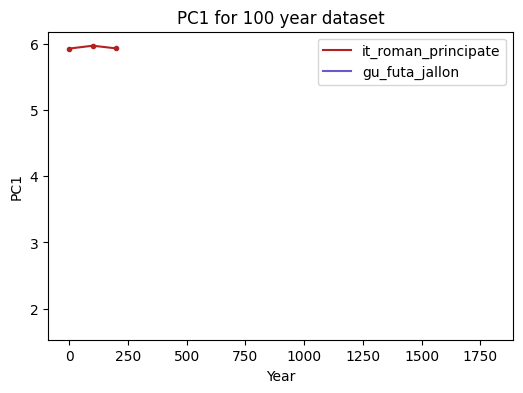

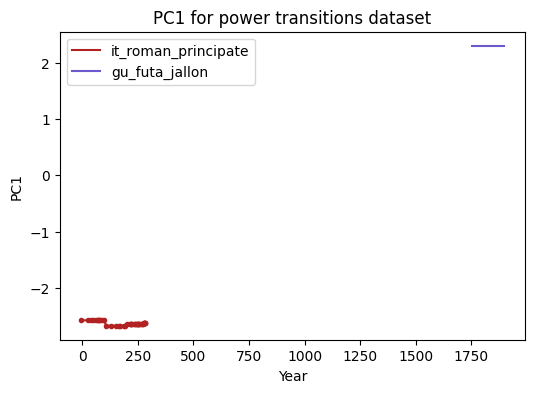

In [45]:
pols = ['it_roman_principate','gu_futa_jallon']
colors  = ['firebrick', 'slateblue']

fig, ax = plt.subplots(figsize=(6, 4))
for pol in pols:
    color = colors[pols.index(pol)]
    plt.plot(dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.PolityName == pol].sort_values(by='Year').Year,dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.PolityName == pol].sort_values(by='Year')['PC_1'], label = pol, color = color)
    plt.plot(dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.PolityName == pol].sort_values(by='Year').Year,dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.PolityName == pol].sort_values(by='Year')['PC_1'],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('PC1 for 100 year dataset')
# plt.xlim(-6000,2000)
plt.show()


fig, ax = plt.subplots(figsize=(6, 4))
for pol in pols:
    color = colors[pols.index(pol)]
    plt.plot(dataset_PT.scv_imputed.loc[dataset_PT.scv_imputed.PolityName == pol].sort_values(by='Year').Year,dataset_PT.scv_imputed.loc[dataset_PT.scv_imputed.PolityName == pol].sort_values(by='Year')['PCA_1'], label = pol, color = color)
    plt.plot(dataset_PT.scv_clean.loc[dataset_PT.scv_clean.PolityName == pol].sort_values(by='Year').Year,dataset_PT.scv_clean.loc[dataset_PT.scv_clean.PolityName == pol].sort_values(by='Year')['PCA_1'],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('PC1 for power transitions dataset')

plt.show()

In [46]:
import pandas as pd
import pyreadr
from utils import download_data
data = pyreadr.read_r("/Users/mperuzzo/Documents/PT_analysis/fromJim2/sql_data_13may24_TableDat_5n_100yrs.Rdata")
polity_df = download_data("https://seshatdata.com/api/core/polities/?page_size=100")
R_data = data['raw.cc.mean']
R_data_imp = data['imp.cc.mean']

Downloaded 839 rows


In [47]:
R_data['NGA'] = R_data.PolityID.apply(lambda x: polity_df.loc[polity_df['new_name'] == x].iloc[0]['home_nga_name'] if len(polity_df.loc[polity_df['new_name'] == x]) > 0 else x)

In [48]:

R_data = R_data.rename(columns={'PolityID':'PolityName',
                                'NGA.Time':'Year',
                                'Hier' : 'Hierarchy',
                                'Gov' : 'Government',
                                'Infra' : 'Infrastructure',
                                "Info" : "Information"
                                })

sc_columns = ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']
all_cols = ['PolityName','Year','NGA']+sc_columns

In [49]:
dataset_R = TSD(categories=['sc'], template_path="/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/test.csv")
dataset_R.initialize_dataset_grid(-10000,2000,100)
dataset_R.scv = R_data[all_cols]

Loaded template from /Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/test.csv
Downloaded 839 rows


In [50]:
dataset_R.impute_missing_values()
dataset_R.compute_PCA(sc_columns, 'PC', n_cols = 2, n_PCA = 8)

Explained variance by each PC:
PC1: 78.91%
PC2: 5.14%
PC3: 4.67%
PC4: 3.66%
PC5: 3.32%
PC6: 1.68%
PC7: 1.54%
PC8: 1.08%


In [51]:
dataset_R.save_dataset(path = '../datasets', name = 'R_data_with_PCA')

dataset_R2 = TSD(file_path='../datasets/R_data_with_PCA.xlsx')

Dataset saved to ../datasets/R_data_with_PCA.xlsx
Dataset loaded from ../datasets/R_data_with_PCA.xlsx


In [52]:
R_data_imp['NGA'] = R_data_imp.PolityID.apply(lambda x: polity_df.loc[polity_df['new_name'] == x].iloc[0]['home_nga_name'] if len(polity_df.loc[polity_df['new_name'] == x]) > 0 else x)

R_data_imp = R_data_imp.rename(columns={'PolityID':'PolityName',
                                'NGA.Time':'Year',
                                'Hier' : 'Hierarchy',
                                'Gov' : 'Government',
                                'Infra' : 'Infrastructure',
                                "Info" : "Information"
                                })

sc_columns = ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']
all_cols = ['PolityName','Year','NGA']+sc_columns

dataset_R2.scv_imputed = R_data_imp[all_cols]



In [53]:
dataset_R2.compute_PCA(sc_columns, 'PC', n_cols = 2, n_PCA = 8)

Explained variance by each PC:
PC1: 80.37%
PC2: 5.82%
PC3: 3.88%
PC4: 3.52%
PC5: 3.31%
PC6: 1.58%
PC7: 1.22%
PC8: 0.29%


/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/src/TimeSeriesDataset.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.scv_imputed[f"{col_name}_{col+1}"] = pca.transform(df_scaled)[:,col]
/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/src/TimeSeriesDataset.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.scv_imputed[f"{col_name}_{col+1}"] = pca.transform(df_scaled)[:,col]


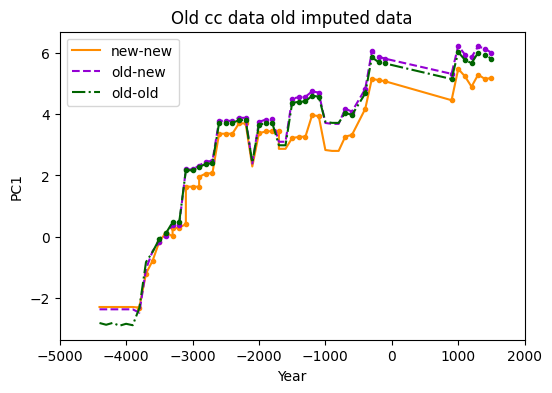

In [54]:
ngas = ['Upper Egypt'] #,'Middle Yellow River Valley']
colors  = ['firebrick', 'slateblue']

fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    # color = colors[ngas.index(nga)]
    color = 'darkorange'
    plt.plot(dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year')['PC_1'], label = 'new-new', color = color)
    plt.plot(dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year')['PC_1'],'o', markersize=3, color = color)

plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('New cc data new analysis')
plt.xlim(-5000,2000)


# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    color = 'darkviolet'
    plt.plot(dataset_R.scv_imputed.loc[dataset_R.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_R.scv_imputed.loc[dataset_R.scv_imputed.NGA == nga].sort_values(by='Year')['PC_1'],'--', label = 'old-new', color = color)
    plt.plot(dataset_R.scv_clean.loc[dataset_R.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_R.scv_clean.loc[dataset_R.scv_clean.NGA == nga].sort_values(by='Year')['PC_1'],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('Old cc data new analysis')
plt.xlim(-5000,2000)



# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    color = 'darkgreen'
    plt.plot(dataset_R2.scv_imputed.loc[dataset_R2.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_R2.scv_imputed.loc[dataset_R2.scv_imputed.NGA == nga].sort_values(by='Year')['PC_1'],'-.', label = 'old-old', color = color)
    plt.plot(dataset_R2.scv_clean.loc[dataset_R2.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_R2.scv_clean.loc[dataset_R2.scv_clean.NGA == nga].sort_values(by='Year')['PC_1'],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('Old cc data old imputed data')
plt.xlim(-5000,2000)
plt.show()

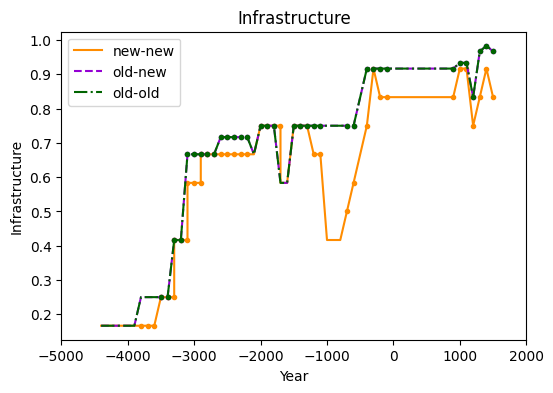

In [55]:
ngas = ['Upper Egypt'] #,'Middle Yellow River Valley']
colors  = ['firebrick', 'slateblue']
variable = 'Infrastructure'

fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    # color = colors[ngas.index(nga)]
    color = 'darkorange'
    plt.plot(dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year')[variable], label = 'new-new', color = color)
    plt.plot(dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)

plt.xlabel('Year')
plt.ylabel(variable)
plt.title('New cc data new analysis')
plt.xlim(-5000,2000)


# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    color = 'darkviolet'
    plt.plot(dataset_R.scv_imputed.loc[dataset_R.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_R.scv_imputed.loc[dataset_R.scv_imputed.NGA == nga].sort_values(by='Year')[variable],'--', label = 'old-new', color = color)
    plt.plot(dataset_R.scv_clean.loc[dataset_R.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_R.scv_clean.loc[dataset_R.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel(variable)
plt.title('Old cc data new analysis')
plt.xlim(-5000,2000)



# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    color = 'darkgreen'
    plt.plot(dataset_R2.scv_imputed.loc[dataset_R2.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_R2.scv_imputed.loc[dataset_R2.scv_imputed.NGA == nga].sort_values(by='Year')[variable],'-.', label = 'old-old', color = color)
    plt.plot(dataset_R2.scv_clean.loc[dataset_R2.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_R2.scv_clean.loc[dataset_R2.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel(variable)
plt.title(variable)
plt.xlim(-5000,2000)
plt.show()

In [56]:
for year,pol in zip(dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year')['PolityName']):
    print(year,pol)

-3800 eg_naqada_1
-3700 eg_naqada_1
-3600 eg_naqada_1
-3500 eg_naqada_2
-3400 eg_naqada_2
-3300 eg_naqada_2
-3300 eg_naqada_3
-3200 eg_naqada_3
-3100 eg_naqada_3
-3100 eg_dynasty_1
-3000 eg_dynasty_1
-2900 eg_dynasty_2
-2900 eg_dynasty_1
-2800 eg_dynasty_2
-2700 eg_dynasty_2
-2600 eg_old_k_1
-2500 eg_old_k_1
-2400 eg_old_k_1
-2300 eg_old_k_2
-2200 eg_old_k_2
-2000 eg_middle_k
-1900 eg_middle_k
-1800 eg_middle_k
-1700 eg_middle_k
-1500 eg_new_k_1
-1400 eg_new_k_1
-1300 eg_new_k_1
-1200 eg_new_k_2
-1100 eg_new_k_2
-700 eg_kushite
-600 eg_saite
-400 eg_inter_occupation
-300 eg_ptolemaic_k_1
-200 eg_ptolemaic_k_2
-100 eg_ptolemaic_k_2
900 eg_thulunid_ikhshidid
1000 tn_fatimid_cal
1100 tn_fatimid_cal
1200 eg_ayyubid_sultanate
1300 eg_mamluk_sultanate_1
1400 eg_mamluk_sultanate_2
1500 eg_mamluk_sultanate_3
